# Advice on making good visualizations

In [1]:
# initialization
import numpy as np
import matplotlib.pyplot as plt

Up to this point we have been focused on the _mechanics_ of producing figures, but what about the _design_ aspects? How to we produce good, _meaningful_ figures? Here are a few general principles for your consideration.

## 1. Provide context in your figure

While a figure may not be entirely self-contained, it is a good idea for the figure to provide context of the data it presents. Concretely, this means:

+ Make sure the figure has a concise and descriptive title
+ Make sure that the axes are labeled, including proper units if applicable

For example, suppose we have data about a remote sensor's depth as a function of time.

<p style="color: red; font-weight: bold;">Bad example:</p>

In [2]:
# data to plot
time = np.arange(0, 5.1, 0.5)
depth = np.array([0.0, 2.2, 4.9, 10.3, 18.2, 19.3, 16.5, 10.1, 5.2, 1.1, 0.0])

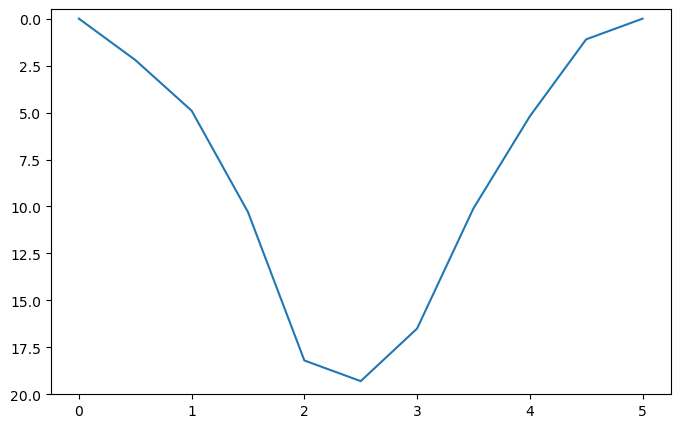

In [3]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()

ax.plot(time, depth)
ax.set_ylim(20, -0.5)

plt.show(fig)

The above figure provides no context about what what the axes values actually represent, and does not describe what it is plotting. It also give little hint about how frequent the data is collected

<p style="color: blue; font-weight: bold;">Good example:</p>

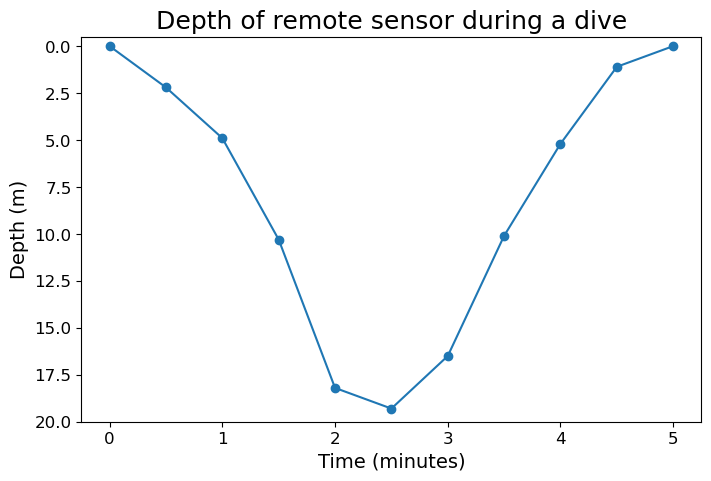

In [31]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()

ax.plot(time, depth, marker="o")
ax.set_ylim(20, -0.5)

ax.set_title("Depth of remote sensor during a dive", fontsize=18)

ax.set_xlabel("Time (minutes)", fontsize=14)
ax.set_ylabel("Depth (m)", fontsize=14)
ax.tick_params(labelsize=12)

plt.show(fig)

## 2. Prefer simplicity and clarity

Sometimes a figure can show too many visual elements that reduce its clarity. For example, suppose we have some data of temperature versus salinity, and we want to make a scatter plot to illustrate how they may be related

**Note**: the data we used is a subset of the [CalCOFI bottle data](https://calcofi.org/data/oceanographic-data/bottle-database/), and you can download .txt file we used [here](https://github.com/OCEAN-215-2025/preclass/tree/main/week_05/data/temperature_salinity.txt).

<p style="color: red; font-weight: bold;">Bad example:</p>

In [20]:
# Load the prepared data

# NOTE: don't worry about learning np.loadtxt()
# We will cover data loading tools next week

# Also don't worry about how we obtained the best-fitted line
# We will cover linear regression in a future week

data = np.loadtxt("data/temperature_salinity.txt")
temp = data[:, 0]
salinity = data[:, 1]

slope = -0.0472
intercept = 33.98
temp_fit = np.array([8, 16])
sal_fit = slope * temp_fit + intercept

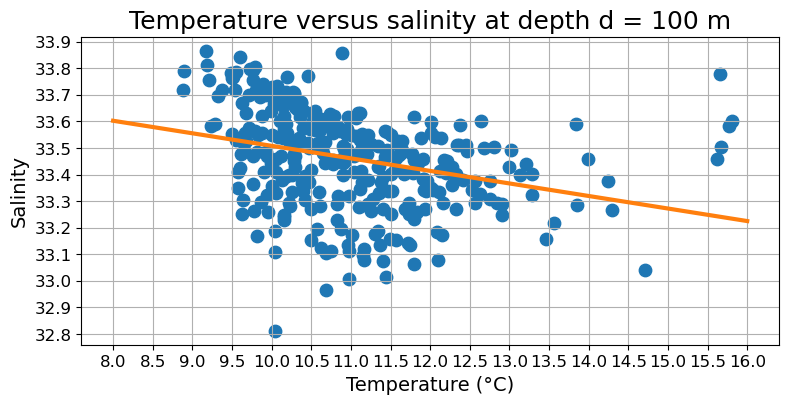

In [39]:
# Plot the data

fig = plt.figure(figsize=(9, 4))
ax = fig.add_subplot()

ax.set_title("Temperature versus salinity at depth d = 100 m", fontsize=18)

ax.set_xlabel("Temperature (°C)", fontsize=14)
ax.set_ylabel("Salinity", fontsize=14)
ax.tick_params(labelsize=12)

ax.set_xticks(np.arange(8.0, 16.1, 0.5))
ax.set_yticks(np.arange(32.8, 34.0, 0.1))
ax.grid()

ax.scatter(temp, salinity, s=80, marker="o")
ax.plot(temp_fit, sal_fit, lw=3, c="tab:orange")

plt.show(fig)

Since the purpose of the graph is to guide us towards a general trend, the grid does not provide any useful information. In fact, it likely distract the reader from the trend line, which is more important. Moreover, the interval between ticks are probably too small that it becomes hard to appreciate the overall scale of data. Finally, the dot that represents data are also too thick, making hard to appreciate the actual among of data presented.

<p style="color: blue; font-weight: bold;">Good example:</p>

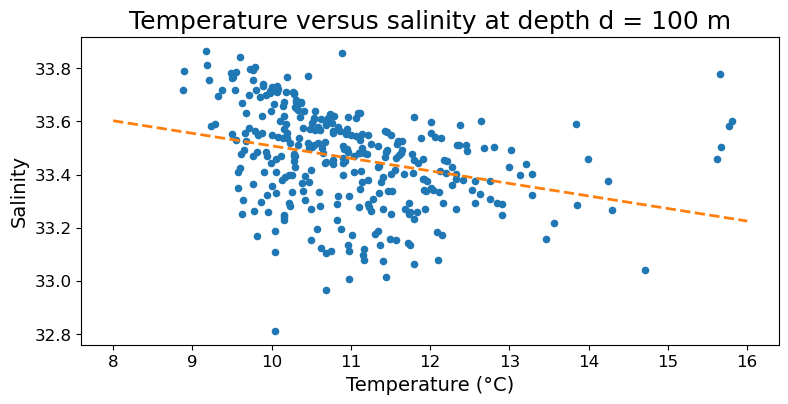

In [43]:
# Plot the data

fig = plt.figure(figsize=(9, 4))
ax = fig.add_subplot()

ax.set_title("Temperature versus salinity at depth d = 100 m", fontsize=18)

ax.set_xlabel("Temperature (°C)", fontsize=14)
ax.set_ylabel("Salinity", fontsize=14)
ax.tick_params(labelsize=12)

ax.set_xticks(np.arange(8.0, 16.1, 1))
ax.set_yticks(np.arange(32.8, 34.0, 0.2))

ax.scatter(temp, salinity, s=20, marker="o")
ax.plot(temp_fit, sal_fit, lw=2, ls="--", c="tab:orange")

plt.show(fig)

## 3. Keep the visual elements consistent

<p style="color: red; font-weight: bold;">Bad example:</p>

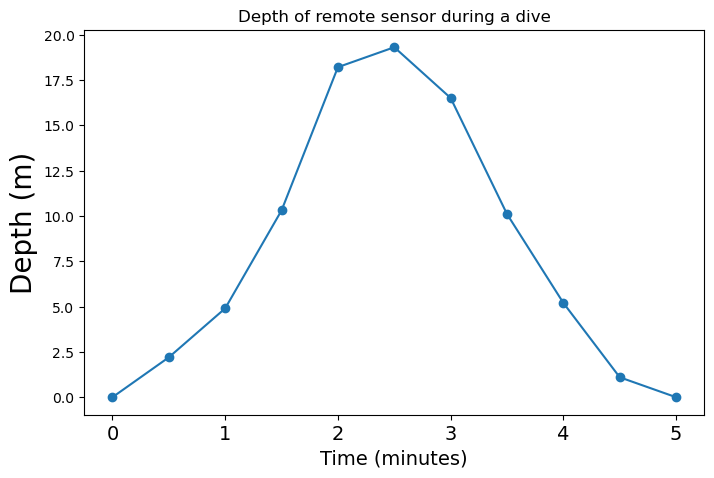

In [29]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()

ax.plot(time, depth, marker="o")

ax.set_title("Depth of remote sensor during a dive", fontsize=12)
ax.set_xlabel("Time (minutes)", fontsize=14)
ax.set_ylabel("Depth (m)", fontsize=20)
ax.tick_params(axis="x", labelsize=14)

plt.show(fig)

Here depth is plotted with upward being positive, in contradiction to common oceanographic convention. Moreover, the font size of the x- and y-axis labels are unequal, and both are bigger than the title. The same goes for the size of the tick labels.

<span style="color: blue; font-weight: bold;">Good example:</span> (same as the good example under bullet point #1)

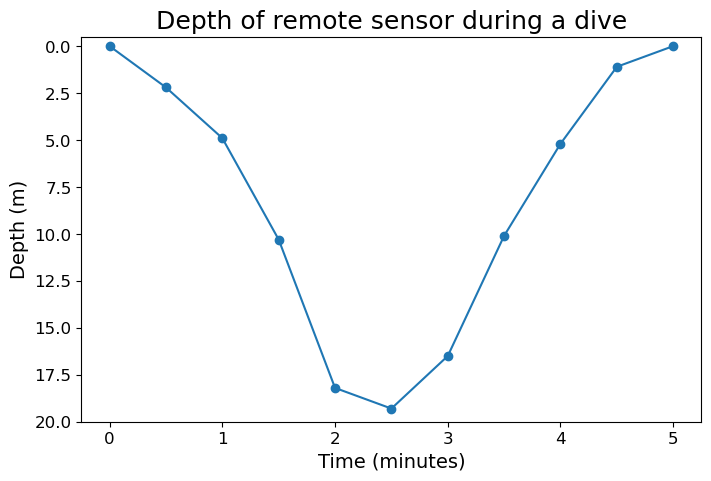

In [32]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()

ax.plot(time, depth, marker="o")
ax.set_ylim(20, -0.5)

ax.set_title("Depth of remote sensor during a dive", fontsize=18)

ax.set_xlabel("Time (minutes)", fontsize=14)
ax.set_ylabel("Depth (m)", fontsize=14)
ax.tick_params(labelsize=12)

plt.show(fig)

## 4. Keep accessibility in mind

In essence, we should be thoughtful about text size, and we should choose our color carefully so that people who have color blindness or printed on grayscale can still glimpse useful information about the figure. In addition, if color is used to distinguish between different kinds of data, try to add another distinguishing visual element on top of color.

<p style="color: red; font-weight: bold;">Bad example:</p>

In [34]:
# data to be plotted
t_array = np.linspace(0, 10, 51)
vel_dragless = 10 * t_array
vel_dragful = 100 * (1 - np.exp(-0.2 * t_array))

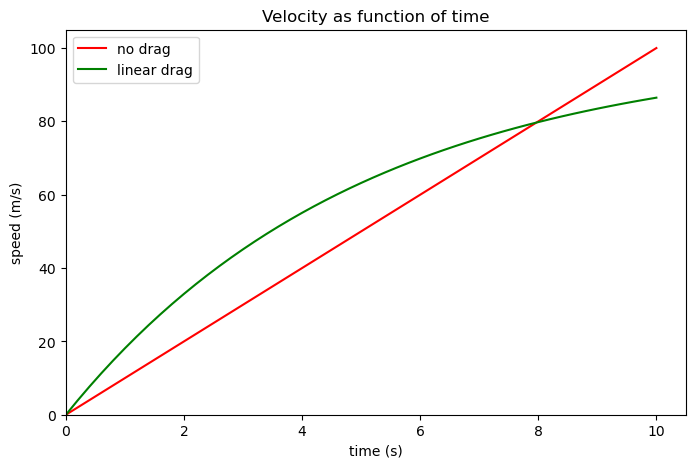

In [35]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()

ax.plot(t_array, vel_dragless, c="red", label="no drag")
ax.plot(t_array, vel_dragful, c="green", label="linear drag")

ax.set_title("Velocity as function of time")
ax.set_xlabel("time (s)")
ax.set_ylabel("speed (m/s)")

ax.set_xlim(0, 10.5)
ax.set_ylim(0, 105)
ax.legend()

plt.show(fig)

In the above figure the two data series are only distinguished form each other by color, and the colors used are not color-blind friendly. Moreover, the tick labels, axes labels, and figure titles are all slightly small.

<p style="color: blue; font-weight: bold;">Good example:</p>

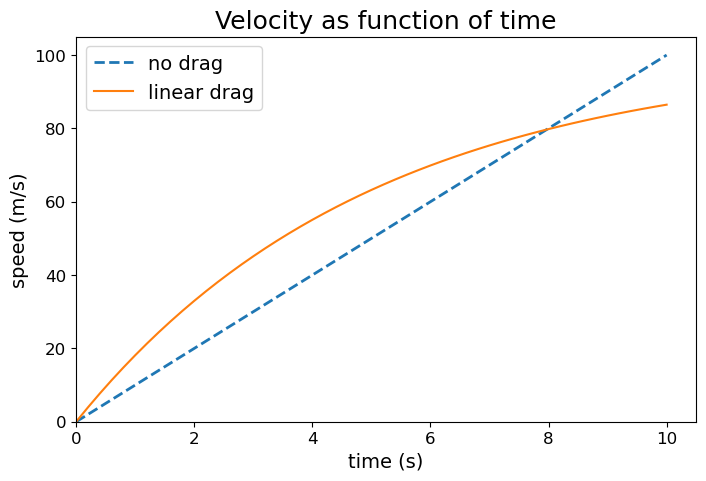

In [36]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()

ax.plot(t_array, vel_dragless, c="tab:blue", ls="--", lw=2, label="no drag")
ax.plot(t_array, vel_dragful, c="tab:orange", label="linear drag")

ax.set_title("Velocity as function of time", fontsize=18)
ax.set_xlabel("time (s)", fontsize=14)
ax.set_ylabel("speed (m/s)", fontsize=14)
ax.tick_params(labelsize=12)

ax.set_xlim(0, 10.5)
ax.set_ylim(0, 105)
ax.legend(fontsize=14)

plt.show(fig)